In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dictionary = pd.DataFrame(["bob", "candle", "yes"], columns=["Word"])

In [3]:
# Set up
min_letters = 1
max_letters = 20
number_of_letters = np.arange(1, max_letters+1)
values = []

In [4]:
# Extract the required df

In [5]:
# Palindrome check
def palindrome_check(words: pd.DataFrame):
    words["Reverse"] = words["Word"].str[::-1]
    words["isPalindrome"] = words["Word"] == words["Reverse"]
    return words["isPalindrome"].sum()

In [6]:
palindrome_check(dictionary)

1

Text(0, 0.5, 'No. of palindromes')

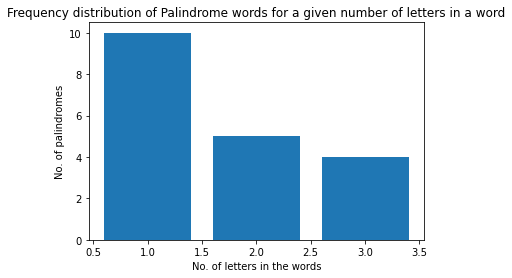

In [ ]:
# Graph of the palindrome frequency distribution
plt.bar([1, 2, 3], [10, 5, 4])
plt.title("Frequency distribution of Palindrome words for a given number of letters in a word")
plt.xlabel("No. of letters in the words")
plt.ylabel("No. of palindromes")